In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('data/dataWrangleNYRealEstate.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35107 entries, 0 to 35106
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BOROUGH                  35107 non-null  int64  
 1   NEIGHBORHOOD             35107 non-null  object 
 2   BUILDING CLASS CATEGORY  35107 non-null  object 
 3   BLOCK                    35107 non-null  int64  
 4   LOT                      35107 non-null  int64  
 5   ADDRESS                  35107 non-null  object 
 6   ZIP CODE                 35106 non-null  float64
 7   RESIDENTIAL UNITS        25173 non-null  float64
 8   COMMERCIAL UNITS         18929 non-null  float64
 9   TOTAL UNITS              25987 non-null  float64
 10  LAND SQUARE FEET         18115 non-null  float64
 11  GROSS SQUARE FEET        18115 non-null  float64
 12  YEAR BUILT               33072 non-null  float64
 13  TAX CLASS                35107 non-null  int64  
 14  BUILDING CLASS        

In [7]:
#Fix datatypes
mapping = {1:'MANHTN', 2:'BRONX', 3: 'BKLYN', 4: 'QUEENS', 5:'STATEN'}
df['BOROUGH'] = df['BOROUGH'].replace(mapping).astype('category')

Tax Class 1 - Residential property Up to 3 units (family homes, apartments with small store or offices attached, condos)

Tax Class 2 - primarily residential property more than 3 units(rentals, cooperatives and condos)

Tax class 3 - utility property - none of these were sold in our dataset

Tax Class 4 - Commercial and industrial properties(offices, factories, retail, warehouses, garage buildings)

1 is higher tax class than 2


In [9]:
df['TAX CLASS'].value_counts()

1    17779
2    15885
4     1443
Name: TAX CLASS, dtype: int64

Text(0, 0.5, 'Number of sales')

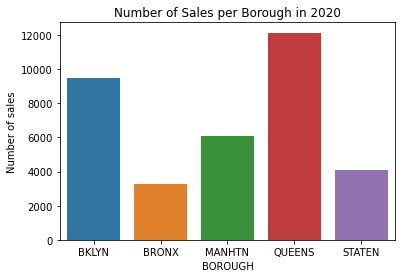

In [46]:
sns.countplot('BOROUGH', data=df)
plt.title('Number of Sales per Borough in 2020')
plt.ylabel('Number of sales')

More sales were in Queens than other boroughs last year and Bronx had the least property sales

Text(0, 0.5, 'Number of sales')

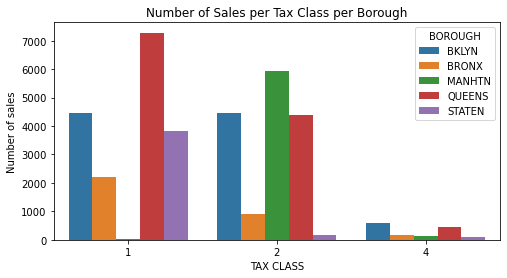

In [47]:
plt.figure(figsize=(8,4))
sns.countplot(x='TAX CLASS', hue='BOROUGH', data=df)
plt.title('Number of Sales per Tax Class per Borough')
plt.ylabel('Number of sales')

More homes of higher tax brackets were sold in Queens and none in Manhattan in 2020.
Also very few commercial and industrial properties were sold last year probably due to COVID.
Most of the sales for Manhatten was in Tax class 2 which is not surprising as it has many properties which has more than 3 units.

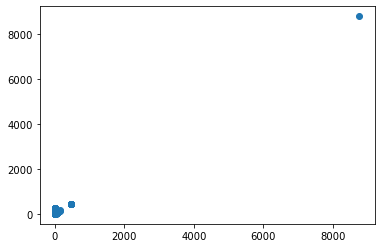

In [12]:
plt.scatter(df['RESIDENTIAL UNITS'], df['TOTAL UNITS'])

In [13]:
# There is clearly one outlier 8812. We will remove it.
df = df[df['TOTAL UNITS'] != 8812]

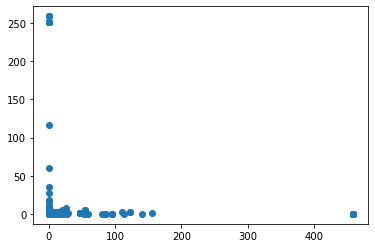

In [14]:
plt.scatter(df['RESIDENTIAL UNITS'], df['COMMERCIAL UNITS'])

In [1]:
#From the above we can notice that every unit is either residential or commercial, but not both

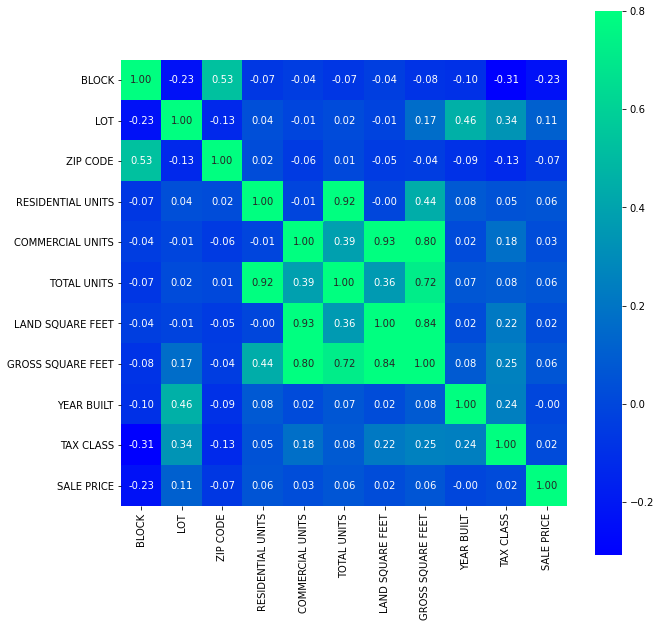

In [16]:
df.corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), vmax=.8,  fmt = '.2f', square = True, annot = True, cmap = 'winter')

We see that Residential Units and Total Units are highly correlated. 
Similarly Land Square Feet and Commercial Units.
Next is Gross Square feet and Residential Units.

In [17]:
df['BUILDING CLASS CATEGORY'][df['TOTAL UNITS'].isnull()].value_counts()

10 COOPS - ELEVATOR APARTMENTS       6798
09 COOPS - WALKUP APARTMENTS         1575
17 CONDO COOPS                        617
01 ONE FAMILY DWELLINGS               104
13 CONDOS - ELEVATOR APARTMENTS        12
15 CONDOS - 2-10 UNIT RESIDENTIAL      11
47 CONDO NON-BUSINESS STORAGE           1
04 TAX CLASS 1 CONDOS                   1
11 SPECIAL CONDO BILLING LOTS           1
Name: BUILDING CLASS CATEGORY, dtype: int64

In [18]:
len(df[(df['BUILDING CLASS CATEGORY'].str.contains('COOPS')==False) & (df['TOTAL UNITS'].isnull())])

130

In [19]:
df['RESIDENTIAL UNITS'][df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS'].value_counts()

1.0    8948
2.0      20
0.0      11
Name: RESIDENTIAL UNITS, dtype: int64

In [20]:
# Most of the total units which are not filled are coop housing where people buy shares 
# in that building and occupy instead of purchasing the house. As they are still residential units, 
# we will fill the corresponding residential unit and total unit as 1. Similarly for category 01 ONE FAMILY DWELLINGS
# and other categories as well


In [21]:
df.loc[df['TOTAL UNITS'].isnull(), 'RESIDENTIAL UNITS'] = 1
df.loc[df['TOTAL UNITS'].isnull(), 'TOTAL UNITS'] = 1

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35106 entries, 0 to 35106
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   BOROUGH                  35106 non-null  category
 1   NEIGHBORHOOD             35106 non-null  object  
 2   BUILDING CLASS CATEGORY  35106 non-null  object  
 3   BLOCK                    35106 non-null  int64   
 4   LOT                      35106 non-null  int64   
 5   ADDRESS                  35106 non-null  object  
 6   ZIP CODE                 35105 non-null  float64 
 7   RESIDENTIAL UNITS        34292 non-null  float64 
 8   COMMERCIAL UNITS         18928 non-null  float64 
 9   TOTAL UNITS              35106 non-null  float64 
 10  LAND SQUARE FEET         18114 non-null  float64 
 11  GROSS SQUARE FEET        18114 non-null  float64 
 12  YEAR BUILT               33071 non-null  float64 
 13  TAX CLASS                35106 non-null  int64   
 14  BUILDI

In [23]:
QUEENS = df[df['BOROUGH']=='QUEENS']
BKLYN = df[df['BOROUGH']=='BKLYN']
MANHTN = df[df['BOROUGH']=='MANHTN']
STATEN = df[df['BOROUGH']=='STATEN']
BRONX  = df[df['BOROUGH']=='BRONX']


Text(0.5, 1.0, 'Sale Price by Year Built')

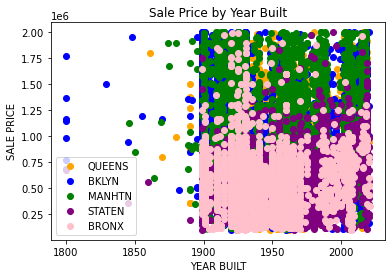

In [41]:
plt.scatter(QUEENS['YEAR BUILT'], QUEENS['SALE PRICE'], marker = 'o', color = 'orange', label = 'QUEENS')
plt.scatter(BKLYN['YEAR BUILT'], BKLYN['SALE PRICE'], marker = 'o', color = 'blue', label = 'BKLYN')
plt.scatter(MANHTN['YEAR BUILT'], MANHTN['SALE PRICE'], marker = 'o', color = 'green', label = 'MANHTN')
plt.scatter(STATEN['YEAR BUILT'], STATEN['SALE PRICE'], marker = 'o', color = 'purple', label = 'STATEN')
plt.scatter(BRONX['YEAR BUILT'], BRONX['SALE PRICE'], marker = 'o', color = 'pink', label = 'BRONX')
plt.legend(loc='lower left')
plt.xlabel('YEAR BUILT')
plt.ylabel('SALE PRICE')
plt.title('Sale Price by Year Built')

Few houses in Brooklyn are very old built in 1800's and their price is comparable with newer houses elsewhere. 
Bronx has comparitively lesser priced houses than other boroughs
Manhattan has more expensive houses.

In [26]:
df_vacant = df[df['BUILDING CLASS CATEGORY'].str.contains('VACANT LAND')]
df_vacant_borough = pd.DataFrame(df_vacant.groupby('BOROUGH')['LAND SQUARE FEET'].sum()).reset_index()
df_vacant_borough.columns = ['BOROUGH', 'LAND SQUARE FEET']

Text(0.5, 0, 'LAND SQUARE FEET')

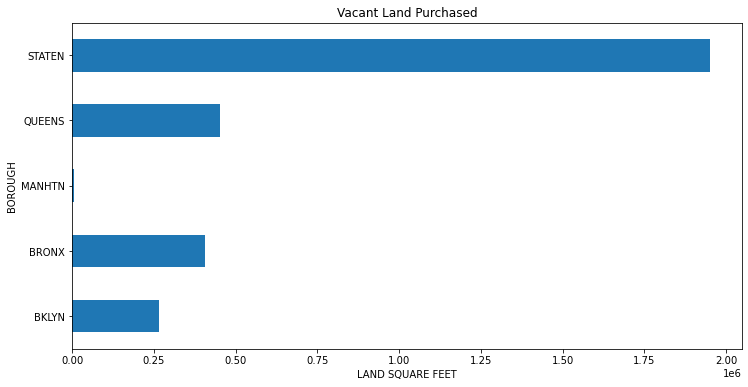

In [27]:
plt.figure(figsize=(12,6))
df_vacant.groupby('BOROUGH')['LAND SQUARE FEET'].sum().plot(kind='barh')
plt.title('Vacant Land Purchased')
plt.xlabel('LAND SQUARE FEET')

Staten Island has the most vacant land that is purchased in 2020. So new development is possible in near future in this area.
Manhattan has the least purchased land. This could also mean that there is not enough place to purchase and is already full.

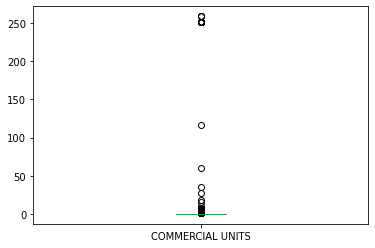

In [29]:
df['COMMERCIAL UNITS'].plot(kind='box')

Text(0.5, 1.0, 'Sale Price by Commercial Units')

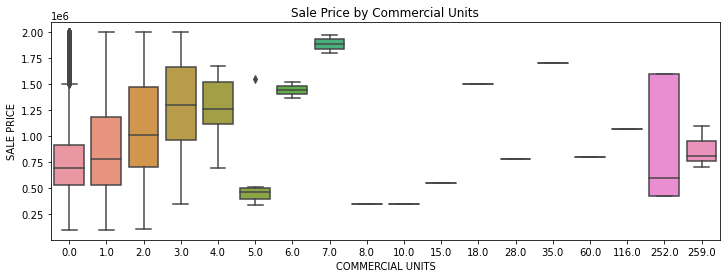

In [34]:
plt.figure(figsize=(12,4))
sns.boxplot(x='COMMERCIAL UNITS', y= 'SALE PRICE', data=df)
plt.title('Sale Price by Commercial Units')

Text(0.5, 1.0, 'Sale Price by Residential Units')

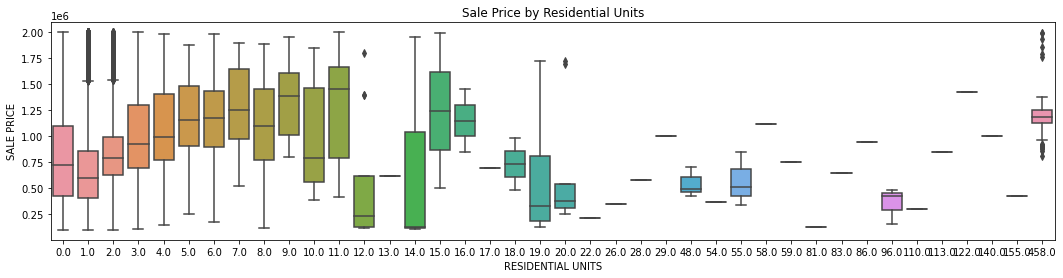

In [35]:
plt.figure(figsize=(18,4))
sns.boxplot(x='RESIDENTIAL UNITS', y= 'SALE PRICE', data=df)
plt.title('Sale Price by Residential Units')

Residences that has 9 units has the highest median sale price compared to even single unit. 

In [428]:
df_vacant.groupby(['BOROUGH', 'NEIGHBORHOOD'])['LAND SQUARE FEET'].sum().dropna().sort_values(ascending=False).head(5)

BOROUGH  NEIGHBORHOOD        
STATEN   ANNADALE                1196910.0
         ROSSVILLE-CHARLESTON     272939.0
QUEENS   ARVERNE                  110296.0
BKLYN    EAST NEW YORK             81257.0
STATEN   TOTTENVILLE               75848.0
Name: LAND SQUARE FEET, dtype: float64

In [95]:
df_vt_nghd = pd.DataFrame(df_vacant.groupby(['BOROUGH', 'NEIGHBORHOOD'])['LAND SQUARE FEET'].sum().dropna().sort_values(ascending=False).head(20)).reset_index()

Text(0.5, 1.0, 'Vacant Land by Neighborhood')

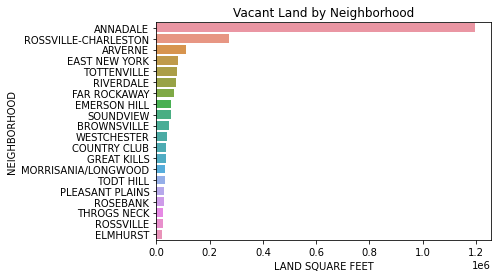

In [97]:
sns.barplot(x='LAND SQUARE FEET', y='NEIGHBORHOOD', data=df_vt_nghd)
plt.title('Vacant Land by Neighborhood')

In [ ]:
plt.figure(figsize=(12,6))
df_vacant.groupby('BOROUGH')['LAND SQUARE FEET'].sum().plot(kind='barh')
plt.title('Vacant Land Purchased')
plt.xlabel('LAND SQUARE FEET')

In [431]:
df_res_notnull = df[df['RESIDENTIAL UNITS']>0]
df_land_notnull = df[df['LAND SQUARE FEET']>0]
df_land_notnull['PRICE PER LAND SQUAREFEET'] = df_land_notnull['SALE PRICE']/ df_land_notnull['LAND SQUARE FEET']
df_res_notnull['PRICE PER  UNIT'] = df_res_notnull['SALE PRICE']/ df_res_notnull['RESIDENTIAL UNITS']

<ipython-input-431-f6b6b11e1f30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_land_notnull['PRICE PER LAND SQUAREFEET'] = df_land_notnull['SALE PRICE']/ df_land_notnull['LAND SQUARE FEET']
<ipython-input-431-f6b6b11e1f30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res_notnull['PRICE PER  UNIT'] = df_res_notnull['SALE PRICE']/ df_res_notnull['RESIDENTIAL UNITS']


In [432]:
df_land_notnull.groupby(['BOROUGH', 'NEIGHBORHOOD'])['PRICE PER LAND SQUAREFEET'].max().dropna().sort_values(ascending=False).head(5)

BOROUGH  NEIGHBORHOOD            
STATEN   TOTTENVILLE                 10714.285714
BRONX    SCHUYLERVILLE/PELHAM BAY     7617.187500
QUEENS   FOREST HILLS                 7608.695652
BKLYN    BEDFORD STUYVESANT           6225.000000
QUEENS   ELMHURST                     6115.107914
Name: PRICE PER LAND SQUAREFEET, dtype: float64

bldg_grouped = df.groupby('BUILDING CLASS CATEGORY')
bldggrp = pd.DataFrame({col:vals['SALE PRICE'] for col,vals in bldg_grouped})

meds = bldggrp.median()
meds.sort_values(ascending=False, inplace=True)
bldggrp = bldggrp[meds.index]
plt.figure(figsize=(16,4))
bldggrp.boxplot()
plt.ylabel('SALE PRICE')
plt.xlabel('BUILDING CLASS CATEGORY')
plt.xticks(rotation=90)
plt.title('Sale Price by Building Class Category')
plt.show()The top 5 expensive commercial land per unit that was sold in 2020

In [434]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_res_notnull.groupby(['BOROUGH', 'NEIGHBORHOOD'])['PRICE PER  UNIT'].mean().dropna().sort_values(ascending=False).head(10)


BOROUGH  NEIGHBORHOOD         
MANHTN   LITTLE ITALY            1535977.58
         CIVIC CENTER            1357074.34
STATEN   TODT HILL               1269402.64
BKLYN    COBBLE HILL             1252440.00
MANHTN   FASHION                 1226413.45
BKLYN    DOWNTOWN-FULTON FERRY   1208114.75
         WILLIAMSBURG-NORTH      1185519.95
         CARROLL GARDENS         1168893.26
MANHTN   SOHO                    1141228.96
BKLYN    COBBLE HILL-WEST        1122791.67
Name: PRICE PER  UNIT, dtype: float64

In [435]:
pd.reset_option('^display.', silent=True)

In [78]:
bldg_grouped = df.groupby('BUILDING CLASS CATEGORY')
bldggrp = pd.DataFrame({col:vals['SALE PRICE'] for col,vals in bldg_grouped})

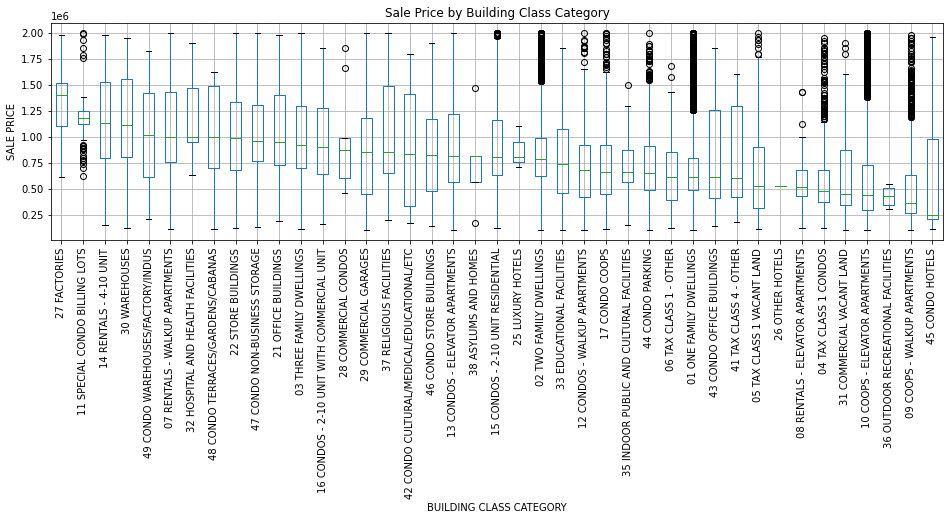

In [79]:
meds = bldggrp.median()
meds.sort_values(ascending=False, inplace=True)
bldggrp = bldggrp[meds.index]
plt.figure(figsize=(16,4))
bldggrp.boxplot()
plt.ylabel('SALE PRICE')
plt.xlabel('BUILDING CLASS CATEGORY')
plt.xticks(rotation=90)
plt.title('Sale Price by Building Class Category')
plt.show()

In [460]:
df.to_csv('data/EDANYRealEstate.csv', index=False )